In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [2]:
uni_df = pd.read_excel('Universities.xlsx')

In [3]:
uni_df

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,Brown,1310,89,22,13,22704,94
1,CalTech,1415,100,25,6,63575,81
2,CMU,1260,62,59,9,25026,72
3,Columbia,1310,76,24,12,31510,88
4,Cornell,1280,83,33,13,21864,90
5,Dartmouth,1340,89,23,10,32162,95
6,Duke,1315,90,30,12,31585,95
7,Georgetown,1255,74,24,12,20126,92
8,Harvard,1400,91,14,11,39525,97
9,JohnsHopkins,1305,75,44,7,58691,87


In [5]:
std = StandardScaler()

In [7]:
# values b/w -3 to +3 
std_df = std.fit_transform(uni_df.iloc[:,1:])
std_df

array([[ 0.41028362,  0.6575195 , -0.88986682,  0.07026045, -0.33141256,
         0.82030265],
       [ 1.39925928,  1.23521235, -0.73465749, -1.68625071,  2.56038138,
        -0.64452351],
       [-0.06065717, -0.76045386,  1.02438157, -0.93346022, -0.16712136,
        -1.65863393],
       [ 0.41028362, -0.02520842, -0.78639393, -0.18066972,  0.29164871,
         0.14422904],
       [ 0.12771914,  0.34241431, -0.32076595,  0.07026045, -0.39084607,
         0.36958691],
       [ 0.69284809,  0.6575195 , -0.83813038, -0.68253005,  0.33778044,
         0.93298158],
       [ 0.4573777 ,  0.71003703, -0.47597528, -0.18066972,  0.29695528,
         0.93298158],
       [-0.10775125, -0.13024348, -0.78639393, -0.18066972, -0.51381683,
         0.59494478],
       [ 1.25797704,  0.76255456, -1.30375836, -0.43159988,  0.85874344,
         1.15833946],
       [ 0.36318954, -0.07772595,  0.24833493, -1.43532055,  2.21481798,
         0.0315501 ],
       [ 1.06960072,  0.92010716, -0.47597528, -0.

# Plot elbow curve

In [8]:
wcss = [] #within clusters sum squares

for i in range(1,10):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(std_df)
    wcss.append(kmeans.inertia_)

In [9]:
wcss

[150.0,
 64.14528395010268,
 46.98497565976428,
 33.654341806512235,
 31.52611829819542,
 23.243404870698935,
 19.408248081151594,
 16.851345047659102,
 14.122411632417396]

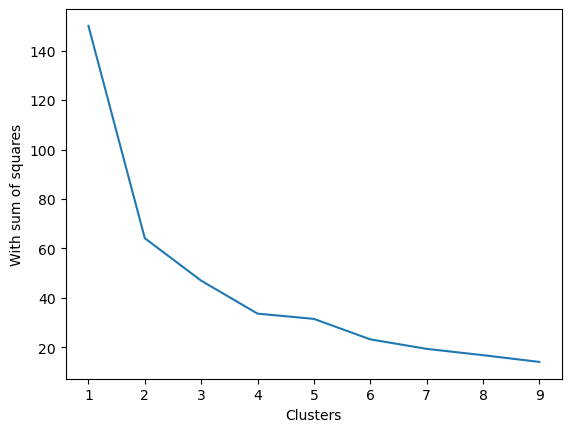

In [11]:
plt.plot(range(1,10),wcss)
plt.xlabel('Clusters')
plt.ylabel('With sum of squares')
plt.show()

# Now, how to decide how many cluster do we need use?

## With help of the elbow curve we can able to decide which cluster we need to take.
## In the graph we can able to see that there is lot of change(depreciation b/w 1 to 2), likewise 2 to 3 clusters if there's any significant changes we should not take those clusters.
## The cluster value should not depreciate(4 to 5) that much from cluster to cluster. That cluster is our k value

In [20]:
k_means = KMeans(n_clusters=6)

In [21]:
k_means.fit(std_df)

KMeans(n_clusters=6)

In [22]:
y = k_means.predict(std_df)

In [23]:
uni_df['cluster'] = y

In [24]:
uni_df

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate,cluster
0,Brown,1310,89,22,13,22704,94,0
1,CalTech,1415,100,25,6,63575,81,2
2,CMU,1260,62,59,9,25026,72,3
3,Columbia,1310,76,24,12,31510,88,0
4,Cornell,1280,83,33,13,21864,90,0
5,Dartmouth,1340,89,23,10,32162,95,4
6,Duke,1315,90,30,12,31585,95,4
7,Georgetown,1255,74,24,12,20126,92,0
8,Harvard,1400,91,14,11,39525,97,4
9,JohnsHopkins,1305,75,44,7,58691,87,2
